In [1]:
import sys
sys.path.append('./projects/tools/')
from email_preprocess import preprocess

import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from time import time

/usr/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [47]:
features_train, features_test, labels_train, labels_test = preprocess(words_file = './projects/tools/word_data.pkl', 
                                                                      authors_file ='./projects/tools/email_authors.pkl')

no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [61]:
features_test[:, 1:2]

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

ValueError: x and y must be the same size

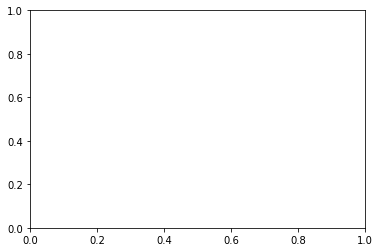

In [50]:
plt.scatter(features_test[:, 3], labels_test)
plt.scatter(features_train[:, 3], labels_train)

In [ ]:
features_train = features_train[:len(features_train)] 
labels_train = labels_train[:len(labels_train)]

C = [10000.]    

for c in C:    
    clf = SVC(C=c, kernel="rbf")

    t0 = time()
    y_fit = clf.fit(features_train, labels_train)
    print ("training time:", round(time()-t0, 3), "s")

    t0 = time()
    pred = clf.predict(features_test)
    print ("predict time:", round(time()-t0, 3), "s")
    
    acc = accuracy_score(pred, labels_test, normalize = True)
    print(acc)
    print('\n')

#     plt.scatter(features_train[:0], labels_train, c=labels_test)
#     plt.show()

In [3]:
# features_train = features_train[:len(features_train)/100] 
# labels_train = labels_train[:len(labels_train)/100]

features_train = features_train[:len(features_train)] 
labels_train = labels_train[:len(labels_train)]

C = 10000.

clf = SVC(C=C, kernel="rbf")

t0 = time()
y_fit = clf.fit(features_train, labels_train)
print ("training time:", round(time()-t0, 3), "s")

t0 = time()
pred = clf.predict(features_test)
print ("predict time:", round(time()-t0, 3), "s")

('training time:', 88.297, 's')
('predict time:', 8.882, 's')


In [ ]:
answer = [pred[10],pred[26],pred[50]]
print(answer)

In [4]:
np.count_nonzero(pred==1)

877

In [5]:
acc = accuracy_score(pred, labels_test, normalize = True)
print(acc)
print('\n')

0.9908987485779295


